In [45]:
from wordcloud import WordCloud#词云包
import pandas as pd
import numpy as np
import codecs
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import jieba
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [55]:
data = pd.read_table('data/ciyun.txt',header=None,encoding='utf-8', names = ['content'])  #导入数据

In [56]:
data = data.dropna()
content=data.content.values.tolist()

In [57]:
segment = []
for line in content:
    segs = jieba.cut(line)
    for seg in segs:
        if(len(seg) > 1 and seg!='\r\n'):
            segment.append(seg)

In [58]:
words_df=pd.DataFrame({'segment':segment})

# 统计词频

In [59]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":np.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,segment,计数
384,麦麦,62
321,老公,60
65,亲亲,56
168,宝宝,29
351,跑步,16


In [60]:
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
from wordcloud import WordCloud,ImageColorGenerator     #自定义背景图片

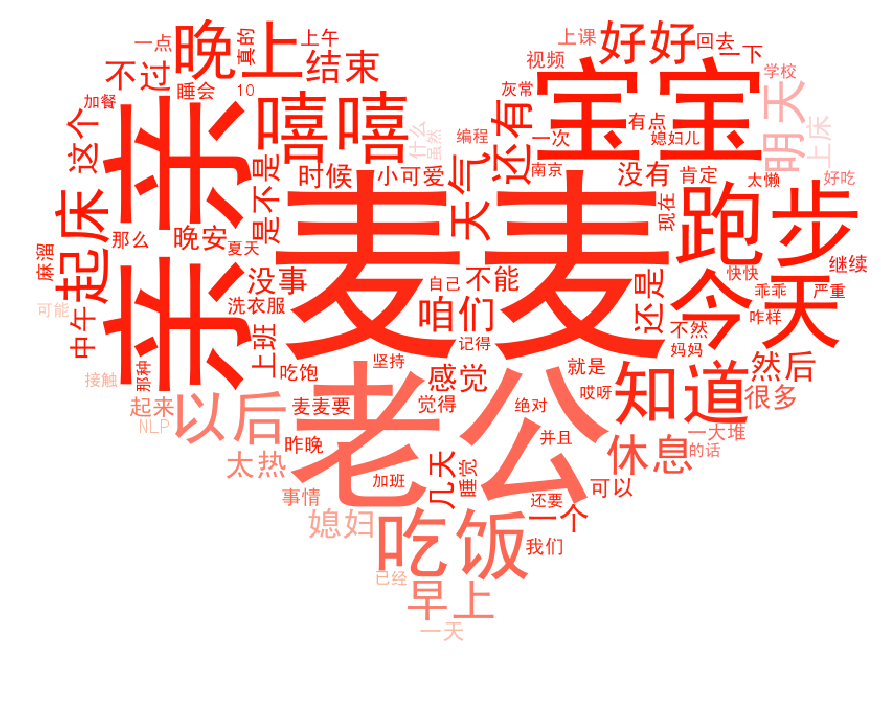

In [61]:
bimg=imread('data/timg.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='data/simhei.ttf',max_font_size=200)
word_frequence = {x[0]:x[1] for x in words_stat.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
fig = plt.gcf()
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))


In [62]:
fig.savefig('hha.png', dpi=100)